In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.patches
import wqchartpy
import datetime
import olm

print("Package versions: ")
print("Matplotlib: ",matplotlib.__version__)
print("NumPy: ", np.__version__)
print("Pandas: ",pd.__version__)
print("WQChartPy: 0.1.10")
#print("datetime
print("olm: 0.39")


Package versions: 
Matplotlib:  3.8.0
NumPy:  1.25.2
Pandas:  1.5.3
WQChartPy: 0.1.10
olm: 0.39


## Read in the MasterWaterQuality.CSV file containing all the data from a weekly samplign field campaign form 2021-2022


Note that this file contains data not used in this analysis. We will only be using the data from Lake Jackson (labeled as "Porter Sink" here), the FSU Well, and Wakulla Springs.

In [2]:
wq_df = pd.read_csv('../data/raw_data/MasterWaterQuality.csv', parse_dates=['Sampling time'],
                    index_col='Sampling time')
wq_df

,ID,Location,dD vs vsmow,d18O vs vsmow,Lithium,Sodium,Ammonium,Potassium,Magnesium,Calcium,...,Bromide,Nitrate,Phosphate,Sulfate,pH,pOH,Total Alkalinity (mg/L as CaCO3),Bicarbonate,EC(us/cm),color
Sampling time,,,,,,,,,,,,,,,,,,,,,
2021-05-04 13:00:00,LJ000,Porter Sink,15.0,3.48,0.0,2.440,0.0,1.077,1.812,3.560,...,0.0,0.1223,0.0,0.0,6.52,7.48,13.8,16.836,52.1,k
2021-06-07 13:49:00,LJ001,Porter Sink,25.9,6.29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.11,8.89,2.8,3.416,44.5,k
2021-06-08 13:08:00,LJ002,Porter Sink,23.3,5.29,0.0,1.818,0.0,0.949,0.966,2.393,...,0.0,0.2130,0.0,0.0,6.55,7.45,6.0,7.320,32.0,k
2021-06-14 17:20:00,LJ003,Porter Sink,29.4,6.43,0.0,2.275,0.0,0.733,1.023,2.460,...,0.0,0.1929,0.0,0.0,5.99,8.01,7.2,8.784,35.0,k
2021-06-21 11:18:00,LJ004,Porter Sink,5.1,3.20,0.0,2.439,0.0,0.778,1.197,2.656,...,0.0,0.0000,0.0,0.0,6.31,7.69,9.8,11.956,38.0,k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23 13:50:00,PRE001,Rain,-26.6,-4.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
2021-07-05 15:39:00,PRE002,Rain,-50.6,-7.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
2021-07-18 13:15:00,PRE003,Rain,-5.8,-2.93,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.2019,0.0,0.0,NaN,NaN,NaN,NaN,NaN,y


### Use the OLM package from the Covington Lab of University of Arkansas to calculate a more accurate Bicarbonate using the Alkalinity value output from our titrator

In [3]:
###Accurate Bicarbonate Calculation OLM Package and USGS procedure
## ALL IN MG/L FROM USGS SOURCE https://or.water.usgs.gov/alk/methods.html#advanced
from olm.calcite import calc_K_2

#Function to convert Alkalinity as mg/L CaCO3 to meq/L
def alk_mgLCaCo3_to_meqL(alk_mgL):
    alk_meqL=alk_mgL/(1/2)/(100.087)
    return alk_meqL

## Second dissociation constant needed for speciation
K2=calc_K_2(298.15)

# ALL IN MG/L FROM USGS SOURCE https://or.water.usgs.gov/alk/methods.html#advanced
## The calculations mostly use meq/l but they are reconverted to mg/L as an output to keep untis consistent in the dataframe

wq_df['H']=(10**-wq_df['pH'])*1.00784*1000
wq_df["OH"]=(1E-14*(10**wq_df["pH"])*17007.3)
wq_df["CO3"]=(((alk_mgLCaCo3_to_meqL(wq_df["Total Alkalinity (mg/L as CaCO3)"])/1000)-(wq_df['OH']/17007.3)+10**-wq_df['pH'])/(2+(10**-wq_df['pH']/K2)))*60009.2

wq_df["HCO3"]=(((alk_mgLCaCo3_to_meqL(wq_df["Total Alkalinity (mg/L as CaCO3)"])/1000)-(wq_df['OH']/17007.3)+10**-wq_df['pH'])/(1+(2*K2*10**wq_df['pH'])))*61017.1



In [5]:
### Creating a df with special formatting to make it compatible with WQChartPy
format_df = pd.DataFrame()

format_df['Sample'] = wq_df['ID']
format_df['Label'] = wq_df['Location']
format_df['Color']=wq_df['color']
format_df['Marker']='o'
format_df.loc[format_df['Label']== "FSU Well", 'Marker'] = 's'
format_df.loc[format_df['Label']== "Wakulla Springs", 'Color'] = 'b'
format_df['Size']=30
format_df['Alpha']=0.9
format_df['pH'] = wq_df['pH']
format_df['Ca'] = wq_df['Calcium']
format_df['Mg'] = wq_df['Magnesium']
format_df['Na'] = wq_df['Sodium']              
format_df['K'] = wq_df['Potassium']   
format_df['HCO3'] = wq_df['HCO3']
format_df['Cl'] = wq_df['Chloride']
format_df['CO3']=0
format_df['SO4'] = wq_df['Sulfate'].values
format_df['TDS'] = wq_df['EC(us/cm)']*0.7
#format_df['Day']= wq_df['Sampling time'].dt.dayofyear-124
format_df['Label']=format_df["Label"].str.replace("Porter Sink", "Lake Jackson")

format_df=format_df.dropna()
format_df.reset_index(drop=True, inplace=True)
format_df
format_df.to_csv("../data/WQ_2021.CSV")


In [5]:
## LOAD In Precipitation Data
precip2021=pd.read_csv("../data/Precipitation_2021DryDowns.CSV", parse_dates=['Date'])
precip2021

,COOPID,YEAR,MONTH,DAY,precipitation,Date
0,88758,2021,6,1,0.0,2021-06-01
1,88758,2021,6,2,0.0,2021-06-02
2,88758,2021,6,3,0.0,2021-06-03
3,88758,2021,6,4,0.0,2021-06-04
4,88758,2021,6,5,0.0,2021-06-05
...,...,...,...,...,...,...
164,88758,2021,11,12,0.0,2021-11-12
165,88758,2021,11,13,0.0,2021-11-13
166,88758,2021,11,14,0.0,2021-11-14
167,88758,2021,11,15,0.0,2021-11-15


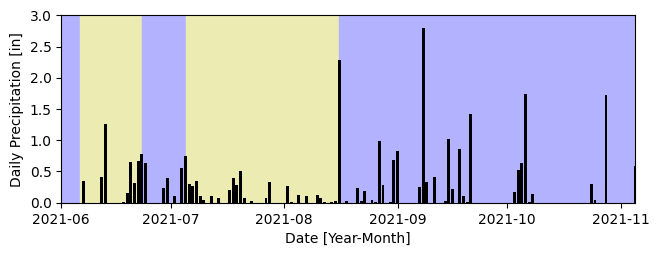

In [65]:
fig, ax = plt.subplots(1,1, figsize=(7,3))
fig.tight_layout(pad=3.0)

wet1= matplotlib.patches.Rectangle((18778,0), 6, 3, color='#b3b2fe')
dry1 = matplotlib.patches.Rectangle((18784,0), 17, 3, color='#ecebb2')
wet2= matplotlib.patches.Rectangle((18801,0), 12, 3, color='#b3b2fe')
dry2 = matplotlib.patches.Rectangle((18813,0), 42, 3, color='#ecebb2')
wet3= matplotlib.patches.Rectangle((18855,0), 82, 3, color='#b3b2fe')
ax.add_patch(wet1)
ax.add_patch(dry1)
ax.add_patch(wet2)
ax.add_patch(dry2)
ax.add_patch(wet3)
ax.bar(precip2021.Date, precip2021['precipitation'], color='k')
ax.set_xlim(left=datetime.date(2021,6,1), right=datetime.date(2021,11,5))
ax.set_ylim(bottom=0, top=3)
ax.set_ylabel("Daily Precipitation [in]")
ax.set_xlabel("Date [Year-Month]")
fig.savefig("../plots/2021_DD_Precip.JPG", dpi=300, format='jpg')
fig.savefig("../plots/2021_DD_Precip.EPS", dpi=300, format='eps')

# Plotting Timesereis of Individual Ions

In [12]:
## SPLIT THE SAMPLE SITES INTO DIFFERENT DATAFRAMES
## Subsetting WQ_DF because it cotains datetime information
wq_df = pd.read_csv("../data/Full2021_WQ_meq_L.csv", parse_dates=['Sampling time'],
                    index_col='Sampling time')
LJ=wq_df.loc[wq_df['Location'] == 'Lake Jackson']

FW=wq_df.loc[wq_df['Location'] == 'FSU Well']
WS=wq_df.loc[wq_df['Location'] == 'Wakulla Springs']
#LJ=LJ.drop('2021-05-04 13:00:00')
#FW=FW.drop('2021-05-04 12:45:00')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


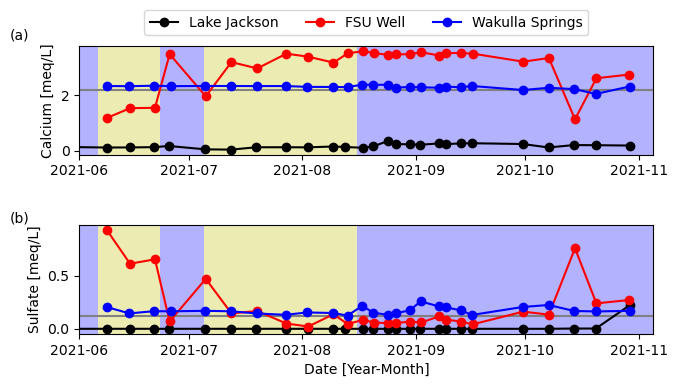

In [18]:
fig, ax = plt.subplots(2,1, figsize=(7,4))
fig.tight_layout(pad=3.0)

## Calcium Plot

ax[0].axhline(y=44/40.078*2, color= 'gray')
line1=ax[0].plot(LJ.index, LJ.Ca,'-o',color='k', label="Lake Jackson")
line2=ax[0].plot(FW.index, FW.Ca,'-o',color='r', label="FSU Well")
line3=ax[0].plot(WS.index, WS.Ca,'-o',color='b', label="Wakulla Springs")
ax[0].axvspan('2021-06-01','2021-06-06' ,facecolor='#b3b2fe')
ax[0].axvspan('2021-06-06', '2021-06-23',facecolor='#ecebb2')
ax[0].axvspan('2021-06-23', '2021-07-05',facecolor='#b3b2fe')
ax[0].axvspan('2021-07-05', '2021-08-16',facecolor='#ecebb2')
ax[0].axvspan('2021-08-16','2021-11-16' ,facecolor='#b3b2fe')
ax[0].set_xlim(left=datetime.date(2021,6,1), right=datetime.date(2021,11,5))

ax[0].set_ylabel("Calcium [meq/L]")

ax[0].legend(ncols=3,bbox_to_anchor=(0.5,1.4), loc="upper center")
ax[0].text(18760,4, "(a)")

## Sulfate Plot
ax[1].axhline(5.77/96.06*2, color='gray')
ax[1].plot(LJ.index, LJ.SO3,'-o',color='k')
ax[1].plot(FW.index, FW.SO3,'-o',color='r')
ax[1].plot(WS.index, WS.SO3,'-o',color='b')
ax[1].axvspan('2021-06-01','2021-06-06' ,facecolor='#b3b2fe')
ax[1].axvspan('2021-06-06', '2021-06-23',facecolor='#ecebb2')
ax[1].axvspan('2021-06-23', '2021-07-05',facecolor='#b3b2fe')
ax[1].axvspan('2021-07-05', '2021-08-16',facecolor='#ecebb2')
ax[1].axvspan('2021-08-16','2021-11-16' ,facecolor='#b3b2fe')
ax[1].set_xlim(left=datetime.date(2021,6,1), right=datetime.date(2021,11,5))

ax[1].set_ylabel("Sulfate [meq/L]")
ax[1].set_xlabel("Date [Year-Month]")
ax[1].text(18760,1, "(b)")
## Sulfate Plot
#ax[2].plot(LJ.index, LJ.Fluoride,'-o',color='k')ax[2].plot(FW.index, FW.Fluoride,'-o',color='r')
#ax[2].plot(WS.index, WS.Fluoride,'-o',color='b')
#ax[2].axvspan('2021-06-01','2021-06-06' ,facecolor='b', alpha=0.3)
#ax[2].axvspan('2021-06-06', '2021-06-23',facecolor='y', alpha=0.3)
#ax[2].axvspan('2021-06-23', '2021-07-05',facecolor='b', alpha=0.3)
#ax[2].axvspan('2021-07-05', '2021-08-16',facecolor='y', alpha=0.3)
#ax[2].axvspan('2021-08-16','2021-11-16' ,facecolor='b', alpha=0.3)
#ax[2].set_xlim(left=datetime.date(2021,6,1), right=datetime.date(2021,11,5))

#ax[2].set_ylabel("Fluoride [ppm]")
#ax[2].set_xlabel("Date [Year-Month]")


#ax[2].axvspan('2021-06-01','2021-06-06' ,facecolor='#b3b2fe', alpha=0.9)
#ax[2].axvspan('2021-06-06', '2021-06-23',facecolor='#ecebb2')
#ax[2].axvspan('2021-06-23', '2021-07-05',facecolor='#b3b2fe')
#ax[2].axvspan('2021-07-05', '2021-08-16',facecolor='#ecebb2')
#ax[2].axvspan('2021-08-16','2021-10-31' ,facecolor='#b3b2fe')

fig.savefig("../plots/WeeklyTimeseries.JPG", dpi=300, format='jpg')
fig.savefig("../plots/WeeklyTimeseries.EPS", dpi=300, format='eps')

In [8]:
wq_df

,ID,Location,dD vs vsmow,d18O vs vsmow,Lithium,Sodium,Ammonium,Potassium,Magnesium,Calcium,...,pH,pOH,Total Alkalinity (mg/L as CaCO3),Bicarbonate,EC(us/cm),color,H,OH,CO3,HCO3
Sampling time,,,,,,,,,,,,,,,,,,,,,
2021-05-04 13:00:00,LJ000,Porter Sink,15.0,3.48,0.0,2.440,0.0,1.077,1.812,3.560,...,6.52,7.48,13.8,16.836,52.1,k,0.000304,0.000563,0.002571,16.837258
2021-06-07 13:49:00,LJ001,Porter Sink,25.9,6.29,NaN,NaN,NaN,NaN,NaN,NaN,...,5.11,8.89,2.8,3.416,44.5,k,0.007823,0.000022,0.000023,3.887505
2021-06-08 13:08:00,LJ002,Porter Sink,23.3,5.29,0.0,1.818,0.0,0.949,0.966,2.393,...,6.55,7.45,6.0,7.320,32.0,k,0.000284,0.000603,0.001199,7.328281
2021-06-14 17:20:00,LJ003,Porter Sink,29.4,6.43,0.0,2.275,0.0,0.733,1.023,2.460,...,5.99,8.01,7.2,8.784,35.0,k,0.001031,0.000166,0.000398,8.839857
2021-06-21 11:18:00,LJ004,Porter Sink,5.1,3.20,0.0,2.439,0.0,0.778,1.197,2.656,...,6.31,7.69,9.8,11.956,38.0,k,0.000494,0.000347,0.001128,11.975302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23 13:50:00,PRE001,Rain,-26.6,-4.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN
2021-07-05 15:39:00,PRE002,Rain,-50.6,-7.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN
2021-07-18 13:15:00,PRE003,Rain,-5.8,-2.93,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN


Trilinear Piper plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 

Trilinear Piper plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 



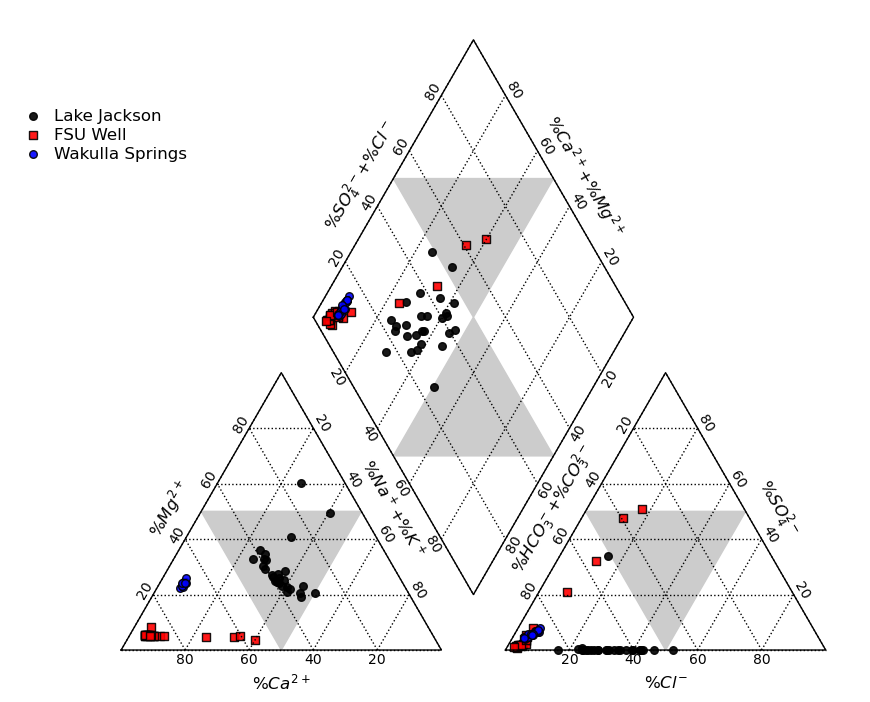

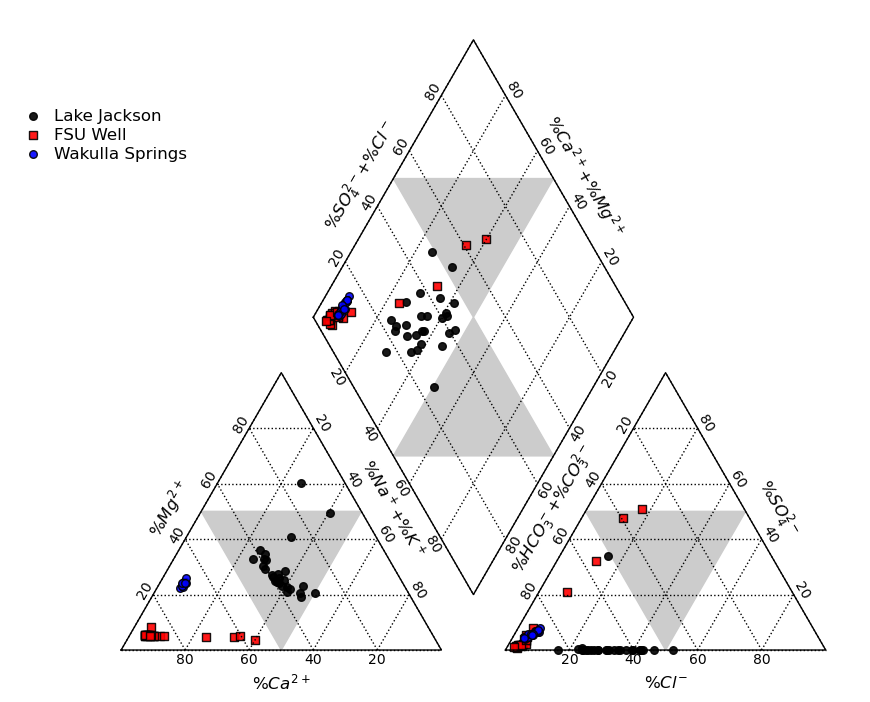

In [23]:
from wqchartpy import triangle_piper

# Draw the diagram and save it to the plots folder in both SVG and jpg formats
triangle_piper.plot(format_df, unit='mg/L', figname='../plots/WeeklyPiper', figformat='jpg')
triangle_piper.plot(format_df, unit='mg/L', figname='../plots/WeeklyPiper', figformat='svg')

Gaillardet plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 

Gaillardet plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 



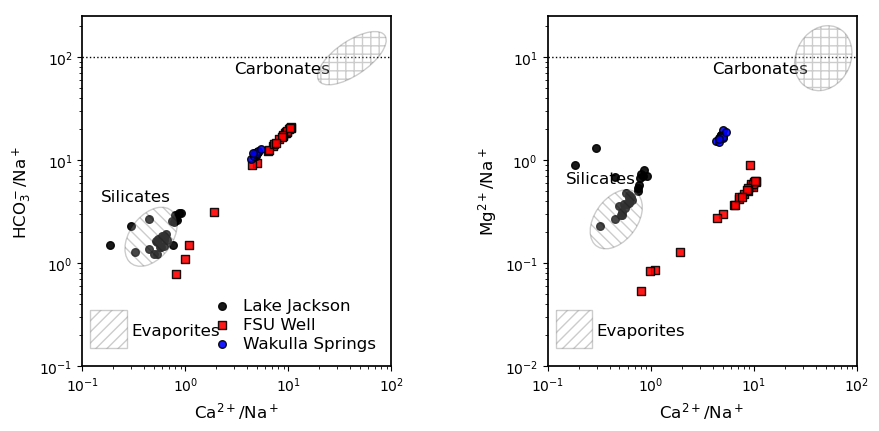

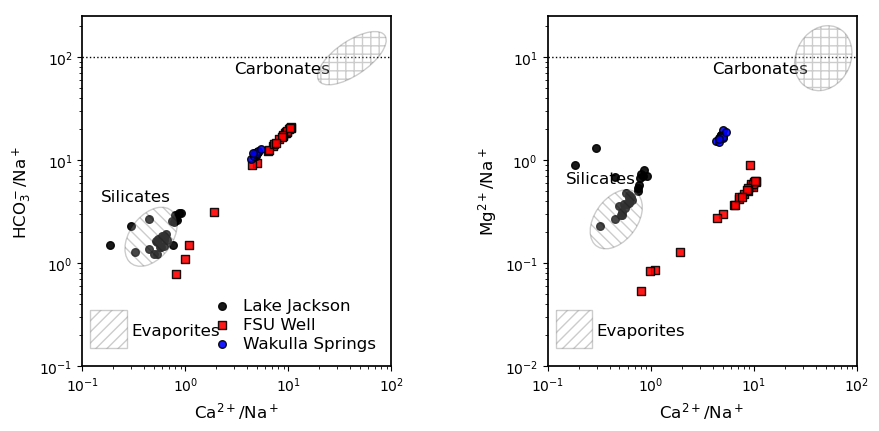

In [24]:
from wqchartpy import gaillardet; 

gaillardet.plot(format_df, unit='mg/L', figname='../plots/WeeklyGaillardet', figformat='jpg')
gaillardet.plot(format_df, unit='mg/L', figname='../plots/WeeklyGaillardet', figformat='svg')

## Read in the Daily scale sampling data that was collected in February 2022

In [9]:
###Daily Scale
FWD = pd.read_csv('../data/FSUWell_FebMar_WQ.csv', parse_dates=['Datatime_Collection'])
FWD

,ID,Datatime_Collection,Li,Na,NH4,K,Mg,Ca,F,Cl,...,NO3,PO4,SO4,EC,TDS,pH,pOH,TotalAlk(mg/L_asCaCO3),Fe,Temp
0,FW100A,NaN,0,20.554,1.313,4.8590,2.124,30.762,1.3080,9.3182,...,8.1533,1.4925,45.2252,213.0,149.10,6.93,7.07,29.2,NaN,22.0
1,FW100B,NaN,0,19.351,1.190,4.4000,2.291,38.636,1.2288,9.0458,...,7.3998,1.4578,41.8836,232.0,162.40,7.33,6.67,46.2,NaN,22.0
2,FW100C,NaN,0,23.277,1.383,5.4860,2.216,34.128,1.3143,10.5550,...,9.6716,1.5028,52.6810,205.0,143.50,7.19,6.81,27.5,NaN,21.9
3,FW101,2/3/2022 17:20,0,19.929,1.255,5.3470,1.940,28.456,1.4120,8.7430,...,8.1602,1.2894,44.4687,201.0,140.70,6.83,7.17,23.6,0.220,20.5
4,FW102,2/4/2022 10:45,0,20.288,1.197,5.1000,2.117,32.874,1.5083,9.1747,...,8.1795,1.5216,44.7318,211.0,147.70,7.13,6.87,30.1,0.090,19.7
5,FW103,2/5/2022 12:10,0,17.335,0.894,4.1830,2.651,49.071,1.2057,9.1106,...,6.2254,1.2443,33.5713,252.0,176.40,8.21,5.79,67.5,0.087,20.7
6,FW104,2/6/2022 18:40,0,11.149,0.454,2.4660,3.369,66.684,0.6093,6.7956,...,3.9636,0.8244,19.0000,294.0,205.80,7.72,6.28,115.2,0.330,21.9
7,FW105,2/7/2022 13:40,0,7.909,0.209,1.4090,4.350,90.422,0.3530,6.1536,...,2.3276,0.5909,8.9506,298.0,208.60,7.64,6.36,135.8,0.000,21.3
8,FW106,2/8/2022 11:40,0,6.577,0.103,1.8280,4.240,85.823,0.3840,5.5829,...,1.5865,0.4624,4.7882,319.0,223.30,7.62,6.38,152.2,0.000,21.1
9,FW107,2/9/2022 16:00,0,6.049,0.156,0.1325,3.903,77.680,0.3223,5.2780,...,1.6294,0.4524,5.2684,308.0,215.60,7.71,6.29,143.8,0.163,21.9


In [10]:
###Accurate Bicarbonate Calculation OLM Package and USGS procedure
## ALL IN MG/L FROM USGS SOURCE https://or.water.usgs.gov/alk/methods.html#advanced
from olm.calcite import calc_K_2

def alk_mgLCaCo3_to_meqL(alk_mgL):
    alk_meqL=alk_mgL/(1/2)/(100.087)
    return alk_meqL

## Second dissociation constant needed for speciation
K2=calc_K_2(298.15)

# ALL IN MG/L FROM USGS SOURCE https://or.water.usgs.gov/alk/methods.html#advanced
FWD['H']=(10**-FWD['pH'])*1.00784*1000
FWD["OH"]=(1E-14*(10**FWD["pH"])*17007.3)
FWD["CO3"]=(((alk_mgLCaCo3_to_meqL(FWD["TotalAlk(mg/L_asCaCO3)"])/1000)-(FWD['OH']/17007.3)+10**-FWD['pH'])/(2+(10**-FWD['pH']/K2)))*60009.2

FWD["HCO3"]=(((alk_mgLCaCo3_to_meqL(FWD["TotalAlk(mg/L_asCaCO3)"])/1000)-(FWD['OH']/17007.3)+10**-FWD['pH'])/(1+(2*K2*10**FWD['pH'])))*61017.1

In [11]:
format_df2 = pd.DataFrame()

format_df2['Sample'] = FWD['ID']
format_df2['Label'] = 'Daily FSU Well'
format_df2['Color']='r'
format_df2['Marker']='s'
format_df2['Size']=30
format_df2['Alpha']=0.9
format_df2['pH'] = FWD['pH']
format_df2['Ca'] = FWD['Ca']
format_df2['Mg'] = FWD['Mg']
format_df2['Na'] = FWD['Na']              
format_df2['K'] = FWD['K']   
format_df2['HCO3'] = FWD['HCO3']
format_df2['Cl'] = FWD['Cl']
format_df2['CO3']=0
format_df2['SO4'] = FWD['SO4'].values
format_df2['TDS'] = FWD['EC']*0.7
#format_df['Day']= wq_df['Sampling time'].dt.dayofyear-124
format_df2
format_df2.drop(format_df2.tail(3).index,inplace=True) # drop last n rows


Trilinear Piper plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 

Trilinear Piper plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 



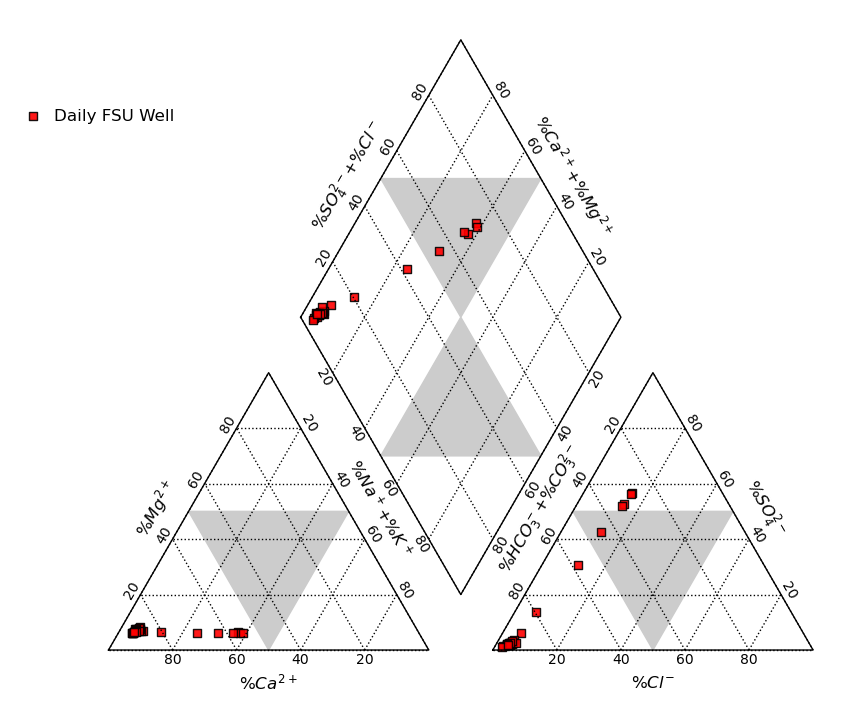

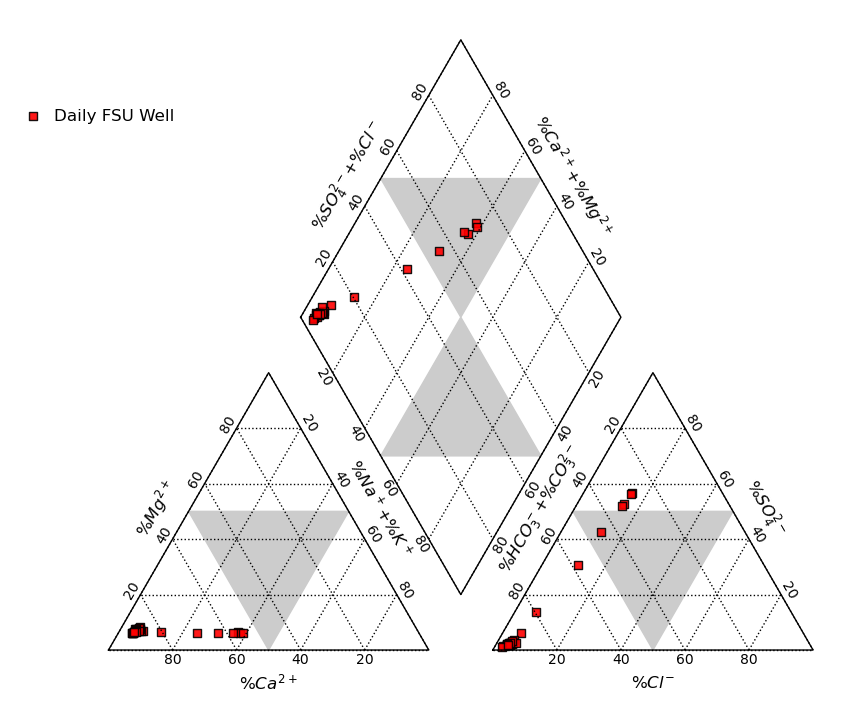

In [12]:
from wqchartpy import triangle_piper

# Draw the diagram
triangle_piper.plot(format_df2, unit='mg/L', figname='../plots/PiperDaily', figformat='jpg')
triangle_piper.plot(format_df2, unit='mg/L', figname='../plots/PiperDaily', figformat='SVG')

Gaillardet plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 

Gaillardet plot created. Saving it to C:\Users\kylec\OneDrive - Florida State University\Documents\PhD\Research\Hydrochemcial_SinkholeDryDown\code 



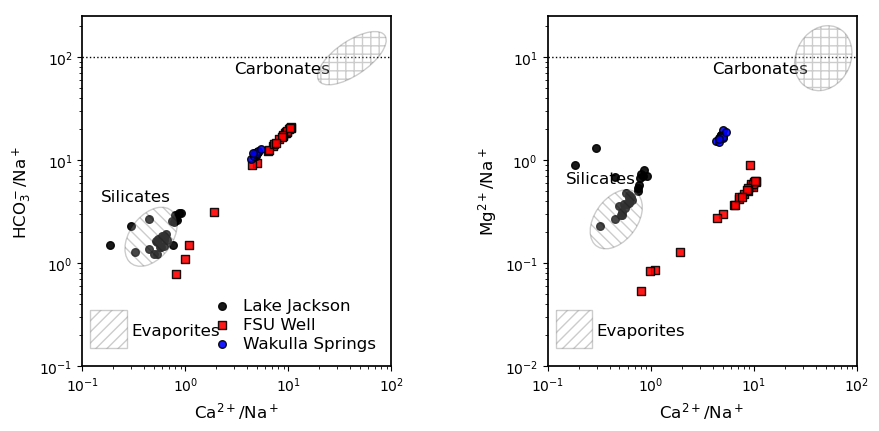

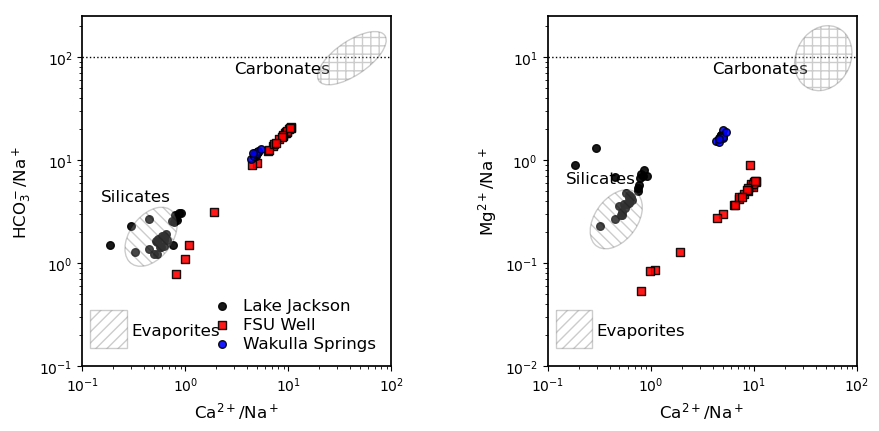

In [31]:
from wqchartpy import gaillardet;
gaillardet.plot(format_df, unit='mg/L', figname='../plots/GaillardetDaily', figformat='svg')
gaillardet.plot(format_df, unit='mg/L', figname='../plots/GaillardetDaily', figformat='jpg')

In [12]:
feb_df=FWD.iloc[3:28]
feb_df

,ID,Datatime_Collection,Li,Na,NH4,K,Mg,Ca,F,Cl,...,TDS,pH,pOH,TotalAlk(mg/L_asCaCO3),Fe,Temp,H,OH,CO3,HCO3
3,FW101,2/3/2022 17:20,0,19.929,1.255,5.3470,1.940,28.456,1.4120,8.7430,...,140.7,6.83,7.17,23.6,0.220,20.5,0.000149,0.001150,0.008969,28.761698
4,FW102,2/4/2022 10:45,0,20.288,1.197,5.1000,2.117,32.874,1.5083,9.1747,...,147.7,7.13,6.87,30.1,0.090,19.7,0.000075,0.002294,0.022803,36.650285
5,FW103,2/5/2022 12:10,0,17.335,0.894,4.1830,2.651,49.071,1.2057,9.1106,...,176.4,8.21,5.79,67.5,0.087,20.7,0.000006,0.027583,0.605679,80.971197
6,FW104,2/6/2022 18:40,0,11.149,0.454,2.4660,3.369,66.684,0.6093,6.7956,...,205.8,7.72,6.28,115.2,0.330,21.9,0.000019,0.008926,0.338252,139.742471
7,FW105,2/7/2022 13:40,0,7.909,0.209,1.4090,4.350,90.422,0.3530,6.1536,...,208.6,7.64,6.36,135.8,0.000,21.3,0.000023,0.007424,0.331952,164.878099
8,FW106,2/8/2022 11:40,0,6.577,0.103,1.8280,4.240,85.823,0.3840,5.5829,...,223.3,7.62,6.38,152.2,0.000,21.1,0.000024,0.007090,0.355369,184.827955
9,FW107,2/9/2022 16:00,0,6.049,0.156,0.1325,3.903,77.680,0.3223,5.2780,...,215.6,7.71,6.29,143.8,0.163,21.9,0.000020,0.008722,0.412682,174.463309
10,FW108,2/10/2022 11:20,0,5.850,0.000,0.8390,4.250,85.525,0.2146,5.3396,...,222.6,7.69,6.31,151.8,0.130,21.8,0.000021,0.008330,0.416131,184.212011
11,FW109,2/11/2022 10:45,0,5.325,0.000,0.8250,4.116,83.670,0.1803,4.9430,...,228.2,7.66,6.34,155.0,0.117,21.9,0.000022,0.007774,0.396669,188.155371
12,FW110,2/12/2022 15:20,0,6.262,0.000,1.0800,4.677,100.452,0.2068,5.7119,...,236.6,7.58,6.42,164.2,0.080,21.8,0.000027,0.006466,0.349781,199.473072


In [2]:

feb_df = pd.read_csv("../data/FSU_Well_FEB_meq_L.csv")
feb_df=feb_df[3:]
feb_df["Datatime_Collection"]=pd.to_datetime(feb_df["Datatime_Collection"])
feb_df

,ID,Datatime_Collection,Li,Na,NH4,K,Mg,Ca,F,Cl,...,SO4,CO3,HCO3,EC,TDS,pH,pOH,Cations,Anions,Charge Balance
3,FW101,2022-02-03 17:20:00,0,0.870262,0.069571,0.136759,0.159638,1.420031,0.074324,0.246629,...,0.925853,0.000298952,0.47,201,140.7,6.83,7.17,2.656261,1.893573625,16.7629743
4,FW102,2022-02-04 10:45:00,0,0.885939,0.066356,0.130441,0.174203,1.640501,0.079393,0.258807,...,0.931330,0.000760062,0.60,211,147.7,7.13,6.87,2.897440,2.054111141,17.03161645
5,FW103,2022-02-05 12:10:00,0,0.756987,0.049559,0.106988,0.218144,2.448775,0.063465,0.256999,...,0.698965,0.020188291,1.33,252,176.4,8.21,5.79,3.580453,2.509082777,17.59362803
6,FW104,2022-02-06 18:40:00,0,0.486856,0.025168,0.063072,0.277227,3.327711,0.032072,0.191695,...,0.395586,0.011274503,2.29,294,205.8,7.72,6.28,4.180034,3.011992768,16.24077678
7,FW105,2022-02-07 13:40:00,0,0.345371,0.011586,0.036038,0.357951,4.512301,0.018581,0.173585,...,0.186354,0.011064513,2.70,298,208.6,7.64,6.36,5.263247,3.148645258,25.13823992
8,FW106,2022-02-08 11:40:00,0,0.287205,0.005710,0.046754,0.348899,4.282799,0.020213,0.157487,...,0.099692,0.011845041,3.03,319,223.3,7.62,6.38,4.971367,3.35922899,19.35201626
9,FW107,2022-02-09 16:00:00,0,0.264148,0.008648,0.003389,0.321168,3.876441,0.016965,0.148886,...,0.109690,0.013755379,2.86,308,215.6,7.71,6.29,4.473795,3.189714146,16.75577881
10,FW108,2022-02-10 11:20:00,0,0.255459,0.000000,0.021459,0.349722,4.267928,0.011296,0.150623,...,0.076065,0.01387034,3.02,318,222.6,7.69,6.31,4.894567,3.308760682,19.33125883
11,FW109,2022-02-11 10:45:00,0,0.232533,0.000000,0.021101,0.338696,4.175358,0.009490,0.139436,...,0.073456,0.013221639,3.08,326,228.2,7.66,6.34,4.767687,3.354818289,17.39449793
12,FW110,2022-02-12 15:20:00,0,0.273450,0.000000,0.027623,0.384859,5.012825,0.010885,0.161126,...,0.087741,0.011658784,3.27,338,236.6,7.58,6.42,5.698757,3.583191016,22.79226073


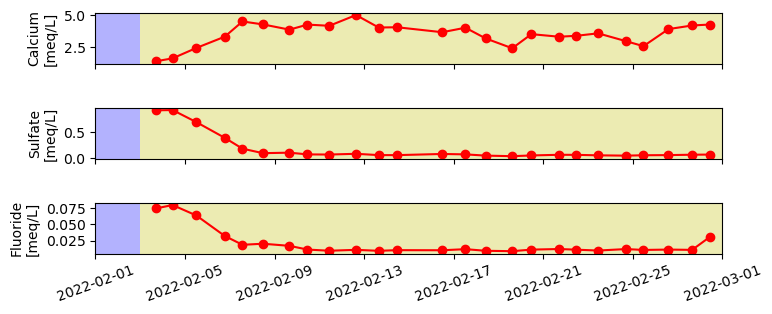

In [24]:

### PLOT TIMESERIES OF INDIVIDUAL IONS AT DAILY SCALE

fig, ax = plt.subplots(3,1, figsize=(7,3))
fig.tight_layout()

## Calcium Plot
ax[0].plot(feb_df.Datatime_Collection, feb_df.Ca,'-o',color='r')
ax[0].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[0].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[0].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))

ax[0].set_ylabel("Calcium\n[meq/L]")
ax[0].set_xticklabels([])

ax[1].plot(feb_df.Datatime_Collection, feb_df.SO4,'-o',color='r')
ax[1].tick_params(axis='x', labelrotation=20)
ax[1].set_ylabel("Sulfate\n[meq/L]")
ax[1].set_xticklabels([])
ax[1].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[1].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[1].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))

ax[2].plot(feb_df.Datatime_Collection, feb_df.F,'-o',color='r')

ax[2].set_ylabel("Fluoride\n[meq/L]")
ax[2].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[2].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[2].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[2].tick_params(axis='x', labelrotation=20)
#ax[2].set_xlabel("Date [Year-Month]")
#fig.savefig("../plots/DailyTimeseries.JPG", dpi=300, format='jpg',bbox_inches="tight")
#fig.savefig("../plots/DailyTimeseries.EPS", dpi=300, format='eps',bbox_inches="tight")

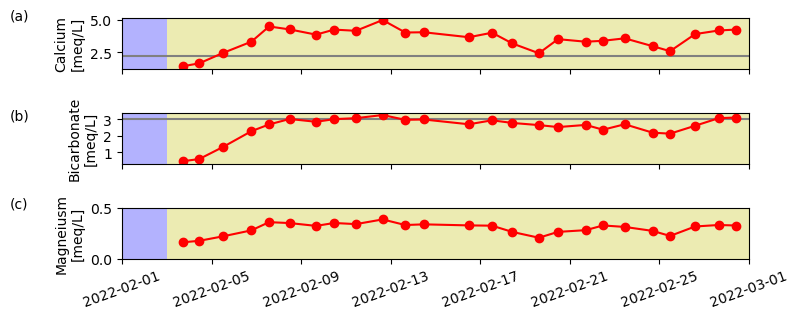

In [3]:
### CARBONATE SYSTEM IONS
### PLOT TIMESERIES OF INDIVIDUAL IONS AT DAILY SCALE
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(3,1, figsize=(7,3))
fig.tight_layout()

## Calcium Plot
ax[0].axhline(y=44/40.078*2, color= 'gray')

ax[0].plot(feb_df.Datatime_Collection, feb_df.Ca,'-o',color='r')
ax[0].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[0].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[0].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))

ax[0].set_ylabel("Calcium\n[meq/L]")
ax[0].set_xticklabels([])
ax[0].text(19019,5, "(a)")

## Bicarbonate Plot
ax[1].axhline(183.7/61.0168, color='gray')
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax[1].plot(feb_df['Datatime_Collection'], np.asarray(feb_df['HCO3'], float),'-o',color='r')
ax[1].tick_params(axis='x', labelrotation=20)
ax[1].set_xticklabels([])
ax[1].set_ylabel("Bicarbonate\n[meq/L]")
#ax[1].set_xticklabels([])
#ax[1].set_yticks([0, 30])

ax[1].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[1].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[1].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[1].text(19019,3, "(b)")
## MAgnsiumn Plot
ax[2].plot(feb_df.Datatime_Collection, feb_df.Mg,'-o',color='r')
ax[2].set_ylabel("Magneiusm\n[meq/L]")
ax[2].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[2].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[2].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[2].set_ylim(0,0.5)
ax[2].axhline(13/24.305*2, color='gray')
ax[2].tick_params(axis='x', labelrotation=20)
ax[2].text(19019,0.5, "(c)")
fig.savefig("../plots/DailyCarbonateTimeseries.JPG", dpi=300, format='jpg',bbox_inches="tight")
fig.savefig("../plots/DailyCarbonateTimeseries.EPS", dpi=300, format='eps',bbox_inches="tight")

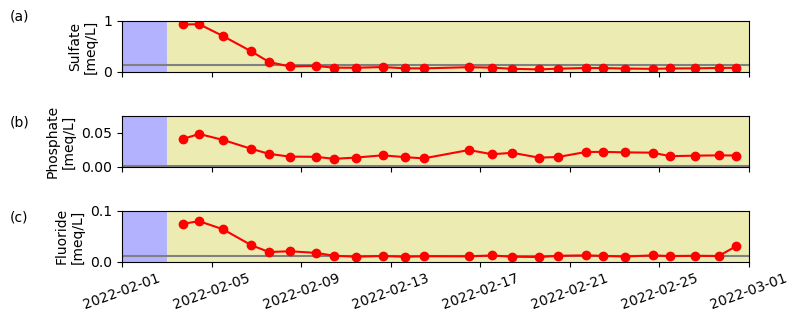

In [39]:
## HAWTHORN GROUP MINERALS

### PLOT TIMESERIES OF INDIVIDUAL IONS AT DAILY SCALE

fig, ax = plt.subplots(3,1, figsize=(7,3))
fig.tight_layout()

## Sulfate Plot
ax[0].axhline(5.77/96.06*2, color='gray')
ax[0].plot(feb_df.Datatime_Collection, feb_df.SO4,'-o',color='r')
ax[0].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[0].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[0].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[0].set_ylabel("Sulfate\n[meq/L]")
ax[0].set_ylim(0,1)
ax[0].set_xticklabels([])
ax[0].text(19019,1, "(a)")

ax[1].axhline(0.027/94.9714*3, color='gray')
ax[1].plot(feb_df.Datatime_Collection, feb_df.PO4,'-o',color='r')
ax[1].tick_params(axis='x', labelrotation=20)
ax[1].set_ylabel("Phosphate\n[meq/L]")
ax[1].set_xticklabels([])

ax[1].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[1].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[1].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[1].set_ylim(0,0.075)
ax[1].text(19019,0.06, "(b)")

ax[2].axhline(0.2/18.998, color='gray')
ax[2].plot(feb_df.Datatime_Collection, feb_df.F,'-o',color='r')

ax[2].set_ylabel("Fluoride\n[meq/L]")
ax[2].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[2].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[2].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[2].set_ylim(0,0.1)
ax[2].tick_params(axis='x', labelrotation=20)
ax[2].text(19019,0.08, "(c)")
fig.savefig("../plots/DailySilicateTimeseries.JPG", dpi=300, format='jpg',bbox_inches="tight")
fig.savefig("../plots/DailySilicateTimeseries.EPS", dpi=300, format='eps',bbox_inches="tight")

In [ ]:
## HAWTHORN GROUP MINERALS

### PLOT TIMESERIES OF INDIVIDUAL IONS AT DAILY SCALE

fig, ax = plt.subplots(2,1, figsize=(7,3))
fig.tight_layout()

## Potassium Plot
ax[0].axhline(0.367/39.098, color='gray')
ax[0].plot(feb_df.Datatime_Collection, feb_df.K,'-o',color='r')
ax[0].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[0].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[0].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[0].set_ylabel("Potassium\n[meq/L]")
ax[0].set_xticklabels([])
ax[0].text(19019,0.3, "(a)")


# Sodium Plot
ax[1].axhline(2.7/22.990, color='gray')
ax[1].plot(feb_df.Datatime_Collection, feb_df.Na,'-o',color='r')

ax[1].set_ylabel("Sodium\n[meq/L]")
ax[1].axvspan('2022-01-30','2022-02-03' ,facecolor='#b3b2fe')
ax[1].axvspan('2022-02-03', '2022-03-02',facecolor='#ecebb2')
ax[1].set_xlim(left=datetime.date(2022,2,1), right=datetime.date(2022,3,1))
ax[1].set_ylim(0,)
ax[1].tick_params(axis='x', labelrotation=20)
ax[1].text(19019,1.2, "(b)")
fig.savefig("../plots/DailyKNaTimeseries.JPG", dpi=300, format='jpg',bbox_inches="tight")
fig.savefig("../plots/DailyKNaTimeseries.EPS", dpi=300, format='eps',bbox_inches="tight")